# Constraints Filtering

The `medchem.constraints.Constraints` module allows to build complex structural constraints for query-based molecular filtering that cannot be captured by only SMARTS or basic molecular properties rules.

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import datamol as dm
import pandas as pd

import medchem

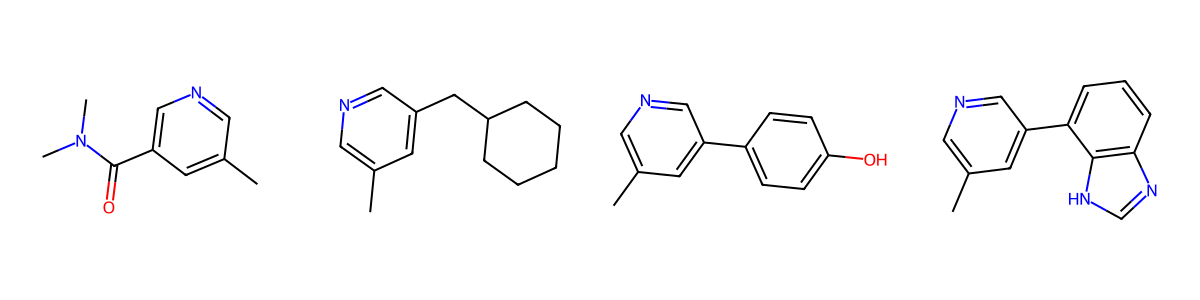

In [2]:
def my_constraint(mol):
    # we want to match either (have phenol) OR (have less than 7 atoms and not ring)
    return mol.HasSubstructMatch(dm.to_mol("Oc1ccccc1")) or (
        mol.GetNumAtoms() < 7 and dm.descriptors.n_rings(mol) < 1
    )


smiles = [
    "CN(C)C(=O)c1cncc(C)c1",  # match, n_atoms < 7 and no ring
    "Cc1cncc(CC2CCCCC2)c1",  # not match, n_atoms < 7 but ring
    "Cc1cncc(c1)-c1ccc(O)cc1",  # match phenol
    "Cc1cncc(c1)-c1cccc2nc[nH]c12",  # no match n_atoms >= 7
]

expected_results = []
mols = [dm.to_mol(x) for x in smiles]

dm.to_image(mols)

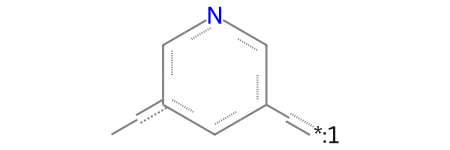

In [3]:
core = dm.from_smarts("[C;H3]c1cncc([*:1])c1")

core

In [4]:
# now let's set the constraints query at the query atom of the code
# At atom map num 1, we want the fragment matching to have additional properties
for atom in core.GetAtoms():
    # we add a recursive query to check again on any match that starts with this atom position
    if atom.GetAtomMapNum() == 1:
        atom.SetProp("query", "my_constraint")

# You can add as many constraints as you want at any atom map number in your original query

In [5]:
# Create the constraints object
constraint_fns = {"my_constraint": my_constraint}
constraint = medchem.constraints.Constraints(core, constraint_fns)

# Check against our list of molecules
matches = [constraint(mol) for mol in mols]

matches

[True, False, True, False]

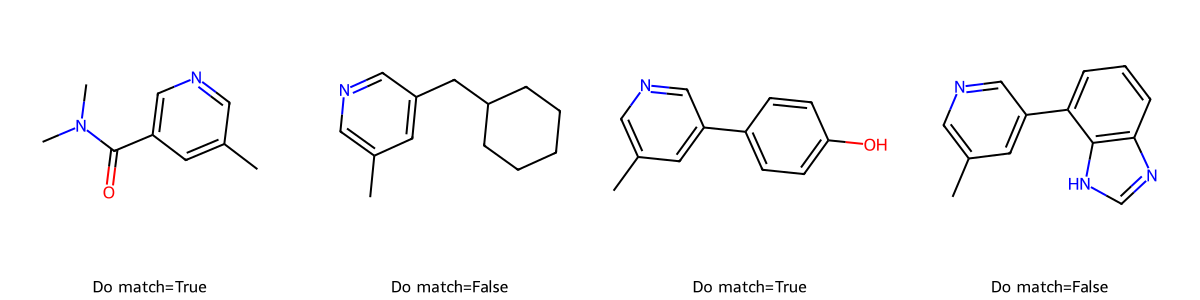

In [6]:
legends = [f"Do match={m}" for m in matches]

dm.to_image(mols, legends=legends)

---

-- The End :-)